# Heart Disease Prediction

In [1]:
#Importing Required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Reading the raw data
data = pd.read_csv("heart_disease.csv")

In [3]:
#First 5 rows of our data
data.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 1 to 303
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   ChestPain  303 non-null    object 
 3   RestBP     303 non-null    int64  
 4   Chol       303 non-null    int64  
 5   Fbs        303 non-null    int64  
 6   RestECG    303 non-null    int64  
 7   MaxHR      303 non-null    int64  
 8   ExAng      303 non-null    int64  
 9   Oldpeak    303 non-null    float64
 10  Slope      303 non-null    int64  
 11  Ca         299 non-null    float64
 12  Thal       301 non-null    object 
 13  AHD        303 non-null    object 
dtypes: float64(2), int64(9), object(3)
memory usage: 35.5+ KB


In [5]:
#Counting number of Null Values in each column
data.isnull().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           4
Thal         2
AHD          0
dtype: int64

#### Checking Unique values in the columns having Null values

In [6]:
data['Ca'].unique()

array([ 0.,  3.,  2.,  1., nan])

In [7]:
data['Thal'].unique()

array(['fixed', 'normal', 'reversable', nan], dtype=object)

In [8]:
data['ChestPain'].unique()

array(['typical', 'asymptomatic', 'nonanginal', 'nontypical'],
      dtype=object)

<AxesSubplot:>

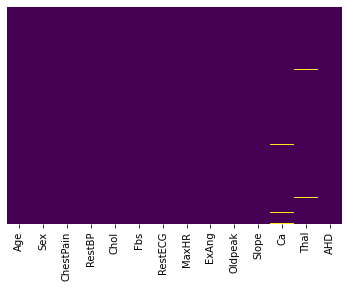

In [9]:
#Visualizing Null values using HeatMap
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [10]:
#Since we have very few null values we can delete the rows of having Null values without affecting our data.

cleaned_data = data.dropna()

In [11]:
#From below data we can confirm that there exist no Null Values in our dataset now

cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 1 to 302
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        297 non-null    int64  
 1   Sex        297 non-null    int64  
 2   ChestPain  297 non-null    object 
 3   RestBP     297 non-null    int64  
 4   Chol       297 non-null    int64  
 5   Fbs        297 non-null    int64  
 6   RestECG    297 non-null    int64  
 7   MaxHR      297 non-null    int64  
 8   ExAng      297 non-null    int64  
 9   Oldpeak    297 non-null    float64
 10  Slope      297 non-null    int64  
 11  Ca         297 non-null    float64
 12  Thal       297 non-null    object 
 13  AHD        297 non-null    object 
dtypes: float64(2), int64(9), object(3)
memory usage: 34.8+ KB


In [12]:
#We have categoricals columns in our dataset, since machine learning models do not understand strings and object
#datatype we will encode these categorical values using Sklearn's LabelEncoder.

from sklearn.preprocessing import LabelEncoder

In [13]:
lb = LabelEncoder()

In [14]:
cleaned_data['ChestPain'] = lb.fit_transform(cleaned_data['ChestPain'])
cleaned_data['Thal'] = lb.fit_transform(cleaned_data['Thal'])
cleaned_data['AHD'] = lb.fit_transform(cleaned_data['AHD'])

<ipython-input-14-3b6b48ef0c83>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['ChestPain'] = lb.fit_transform(cleaned_data['ChestPain'])
<ipython-input-14-3b6b48ef0c83>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Thal'] = lb.fit_transform(cleaned_data['Thal'])
<ipython-input-14-3b6b48ef0c83>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [15]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 1 to 302
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        297 non-null    int64  
 1   Sex        297 non-null    int64  
 2   ChestPain  297 non-null    int32  
 3   RestBP     297 non-null    int64  
 4   Chol       297 non-null    int64  
 5   Fbs        297 non-null    int64  
 6   RestECG    297 non-null    int64  
 7   MaxHR      297 non-null    int64  
 8   ExAng      297 non-null    int64  
 9   Oldpeak    297 non-null    float64
 10  Slope      297 non-null    int64  
 11  Ca         297 non-null    float64
 12  Thal       297 non-null    int32  
 13  AHD        297 non-null    int32  
dtypes: float64(2), int32(3), int64(9)
memory usage: 31.3 KB


In [16]:
cleaned_data.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,3,145,233,1,2,150,0,2.3,3,0.0,0,0
2,67,1,0,160,286,0,2,108,1,1.5,2,3.0,1,1
3,67,1,0,120,229,0,2,129,1,2.6,2,2.0,2,1
4,37,1,1,130,250,0,0,187,0,3.5,3,0.0,1,0
5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,1,0


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
#Splitting the data into 80-20 configuration, alloting 80% to training set and 20% to test set.

X = cleaned_data.drop('AHD', axis=1)
y = cleaned_data['AHD']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [20]:
#Importing Logistic Regression from Linear model family of Sklearn

from sklearn.linear_model import LogisticRegression

In [21]:
logr = LogisticRegression()

In [22]:
logr.fit(X_train, y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
#Getting prediction off of training as well as testing dataset for comparison.

predict_train = logr.predict(X_train)
predict_test = logr.predict(X_test)

In [24]:
#Using Classification Report to analyze the accuracy of the model in both training and testing data.

from sklearn.metrics import classification_report

In [25]:
print(classification_report(y_train, predict_train))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       120
           1       0.87      0.83      0.85       117

    accuracy                           0.86       237
   macro avg       0.86      0.86      0.86       237
weighted avg       0.86      0.86      0.86       237



In [26]:
print(classification_report(y_test, predict_test))

              precision    recall  f1-score   support

           0       0.87      0.82      0.85        40
           1       0.68      0.75      0.71        20

    accuracy                           0.80        60
   macro avg       0.78      0.79      0.78        60
weighted avg       0.81      0.80      0.80        60



### Above you can see, we have achieved the accuracy of 86% in training data and 80% accuracy on test data.

In [27]:
#We are saving out LogR model for later uses (if required)
import pickle
pickle.dump(logr, open("ahd_predictor.sav", 'wb'))

In [28]:
#below code can be used to load the saved pickle model

#Loaded_LogR_model  pickle.load(ope("ahd_predictor.sav", 'rb'))

In [29]:
# Let's try to predict using our own random sample values and lets check what does the model predicts

X_value =[[37,0,0,130,234,1,0,150,1,2.1,2,0,1]]

new_pred = logr.predict(X_value)

In [30]:
print(new_pred)

[0]


## For the provided values model predicted "No Heart Disease"